In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils

In [2]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [3]:
def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

In [4]:
def normalize(image):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = Variable(preprocess(image).unsqueeze(0).cuda())
    return image


####----This is where versions stated to break. 
####----I had to intervene
def predict(image):
#    _, index = vgg(image).data[0].max(0)
#    return str(index[0]), labels[str(index[0])][1]
    #_, index = vgg(image).data.max(0)
    index = vgg(image).data[0].max(0).indices
    print(index)
    #print("==============")
    print(index.item())
    #print("==============")
    print (labels[str(index[0].item())])
    #return str(index), labels[str(index[0].item())]


##--Record the prevalence of each class for current image
def class_prevalence(image):
    output = vgg(image).data[0]
    N = len(output)
    result = {}
    for i in range(N):
        #print(i , end="\t")
        #print( index[i].item(), end="\n")
        result [str(i)] = output[i].item()
    return result


def deprocess(image):
    return image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()

def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image

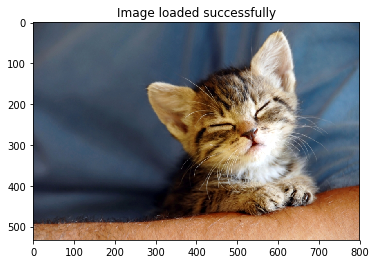

In [5]:
##--load image
kitten_1 = load_image("./images/kitten_1.jpg")

In [6]:
##--Import the model with pretrained weights
vgg = models.vgg16(pretrained=True)

##--Here, we used weights thatwere obtained as a ressult of lengthly 'network training'
##--VGG16, or an other model, has to be retrained for different experiments


In [7]:
##--Put the model on GPU
vgg = vgg.cuda()

In [8]:
##--see all layers. Awe.
#print(vgg)

In [15]:
##--load label from file:
labels = json.load(open('labels/imagenet_class_index.json')) #loads as a dict {}
#for k in labels.keys(): 
#    print(str(k) + "," + str(labels[k]))
#len(labels)

#print(labels['281'])

In [10]:
##--Lets go!

kitten_2 = normalize(kitten_1)
#print(predict(kitten_2))
#predict(kitten_2)

output = vgg(kitten_2)
#print(output)
#print("+++++++++++++++++++++++++++++")

#i = output.data[0].max(0).indices
print(output.data[0])
#print(output.data[0].max(0))
#print(output.data[0].max(0).indices)
#print(output.data[0].max(0).indices.item())
#print (i)
#print (i.item())


print(labels[str(i.item())])
#d = dir(i)
#for e in d: print(e)
    



tensor([-3.0172e+00, -1.1986e+00, -1.8998e+00, -1.1971e+00, -1.5325e+00,
        -1.5370e-02,  6.0900e-01, -1.6167e+00,  1.5567e+00, -2.5063e+00,
        -1.5624e+00, -2.3448e+00,  5.7230e-01, -1.7869e+00, -2.6640e+00,
         8.9858e-01, -2.4701e+00, -2.7066e+00, -3.2224e+00, -3.2978e+00,
        -3.8337e+00, -7.4573e-01, -1.0688e+00, -1.4380e+00,  7.7847e-01,
        -4.3500e+00, -4.5720e+00, -3.7380e+00, -4.3666e+00, -1.1037e+00,
         3.6357e-01, -5.5198e-01, -2.2667e-01, -9.6151e-02, -1.6193e+00,
        -1.7525e+00,  1.7974e+00, -1.5633e+00,  6.4028e-01,  1.2000e+00,
        -2.8107e+00, -1.8544e-01, -2.6185e+00,  3.9450e-01, -3.0935e-01,
        -1.8663e+00, -3.6287e-01, -8.3725e-01, -1.1526e+00, -2.2598e+00,
        -1.1135e+00, -1.3149e+00, -3.5583e+00, -2.6807e+00,  4.1116e-01,
        -1.3745e+00, -2.0054e+00, -9.5899e-01, -2.0634e+00, -9.5245e-01,
         6.5549e-02, -1.5371e+00, -2.0845e+00, -2.3176e+00, -1.7499e+00,
        -4.2196e+00,  3.5117e-01,  9.4370e-01, -2.5

NameError: name 'i' is not defined

In [11]:
##--this is used for visualization of each layer's outputs.

modulelist = list(vgg.features.modules())

In [14]:
##--compare class prevalences:

cp = class_prevalence(kitten_2) 

N = len(labels)
#print(cp)

#--list by class:
for i in range(N):
    print(i, end = "\t") 
    print(labels[str(i)], end = "\t")
    print(cp[str(i)])
    
##--from now on, we only sort data and see which classes are 'winners'
##--To be continued..



0	['n01440764', 'tench']	-1.0186396837234497
1	['n01443537', 'goldfish']	2.167151689529419
2	['n01484850', 'great_white_shark']	-3.485780954360962
3	['n01491361', 'tiger_shark']	0.33351564407348633
4	['n01494475', 'hammerhead']	-2.7718982696533203
5	['n01496331', 'electric_ray']	0.3085658848285675
6	['n01498041', 'stingray']	-3.0836760997772217
7	['n01514668', 'cock']	0.7915195226669312
8	['n01514859', 'hen']	2.153531551361084
9	['n01518878', 'ostrich']	-2.5958735942840576
10	['n01530575', 'brambling']	1.983551025390625
11	['n01531178', 'goldfinch']	-0.343048095703125
12	['n01532829', 'house_finch']	2.110304355621338
13	['n01534433', 'junco']	-2.1741549968719482
14	['n01537544', 'indigo_bunting']	-2.2756004333496094
15	['n01558993', 'robin']	1.7396655082702637
16	['n01560419', 'bulbul']	0.4599645435810089
17	['n01580077', 'jay']	-1.105634093284607
18	['n01582220', 'magpie']	-2.240165948867798
19	['n01592084', 'chickadee']	-2.051424264907837
20	['n01601694', 'water_ouzel']	-3.1361649036

In [22]:
##--List by class prevalence:

##--sorted_class_prevalence
sorted_cp= sorted(cp, key=cp.get, reverse=True)

for i in range(N):
    print(sorted_cp[i], end = "\t") 
    print(labels[sorted_cp[i]], end = "\t")
    print(cp[sorted_cp[i]])
    

281	['n02123045', 'tabby']	15.74615478515625
285	['n02124075', 'Egyptian_cat']	15.612914085388184
282	['n02123159', 'tiger_cat']	15.478860855102539
287	['n02127052', 'lynx']	11.005281448364258
283	['n02123394', 'Persian_cat']	10.740737915039062
457	['n02883205', 'bow_tie']	9.233245849609375
292	['n02129604', 'tiger']	9.04011058807373
722	['n03942813', 'ping-pong_ball']	8.49628734588623
622	['n03657121', 'lens_cap']	8.137709617614746
284	['n02123597', 'Siamese_cat']	8.125133514404297
288	['n02128385', 'leopard']	7.560521125793457
761	['n04074963', 'remote_control']	7.471639156341553
673	['n03793489', 'mouse']	7.291515827178955
478	['n02971356', 'carton']	7.221921443939209
286	['n02125311', 'cougar']	6.845936298370361
289	['n02128757', 'snow_leopard']	6.821112632751465
291	['n02129165', 'lion']	6.516599655151367
539	['n03223299', 'doormat']	6.441550254821777
720	['n03937543', 'pill_bottle']	6.406008243560791
852	['n04409515', 'tennis_ball']	6.394311428070068
700	['n03887697', 'paper_towe

# Output of various layers

In [233]:
def layer_outputs(image):
    outputs = []
    names = []
    for layer in modulelist[1:]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 50)


    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(names[i].partition('(')[0], fontsize=30)

    #plt.savefig('layer_outputs.jpg', bbox_inches='tight')
    plt.savefig('layer_outputs.png', bbox_inches='tight')    

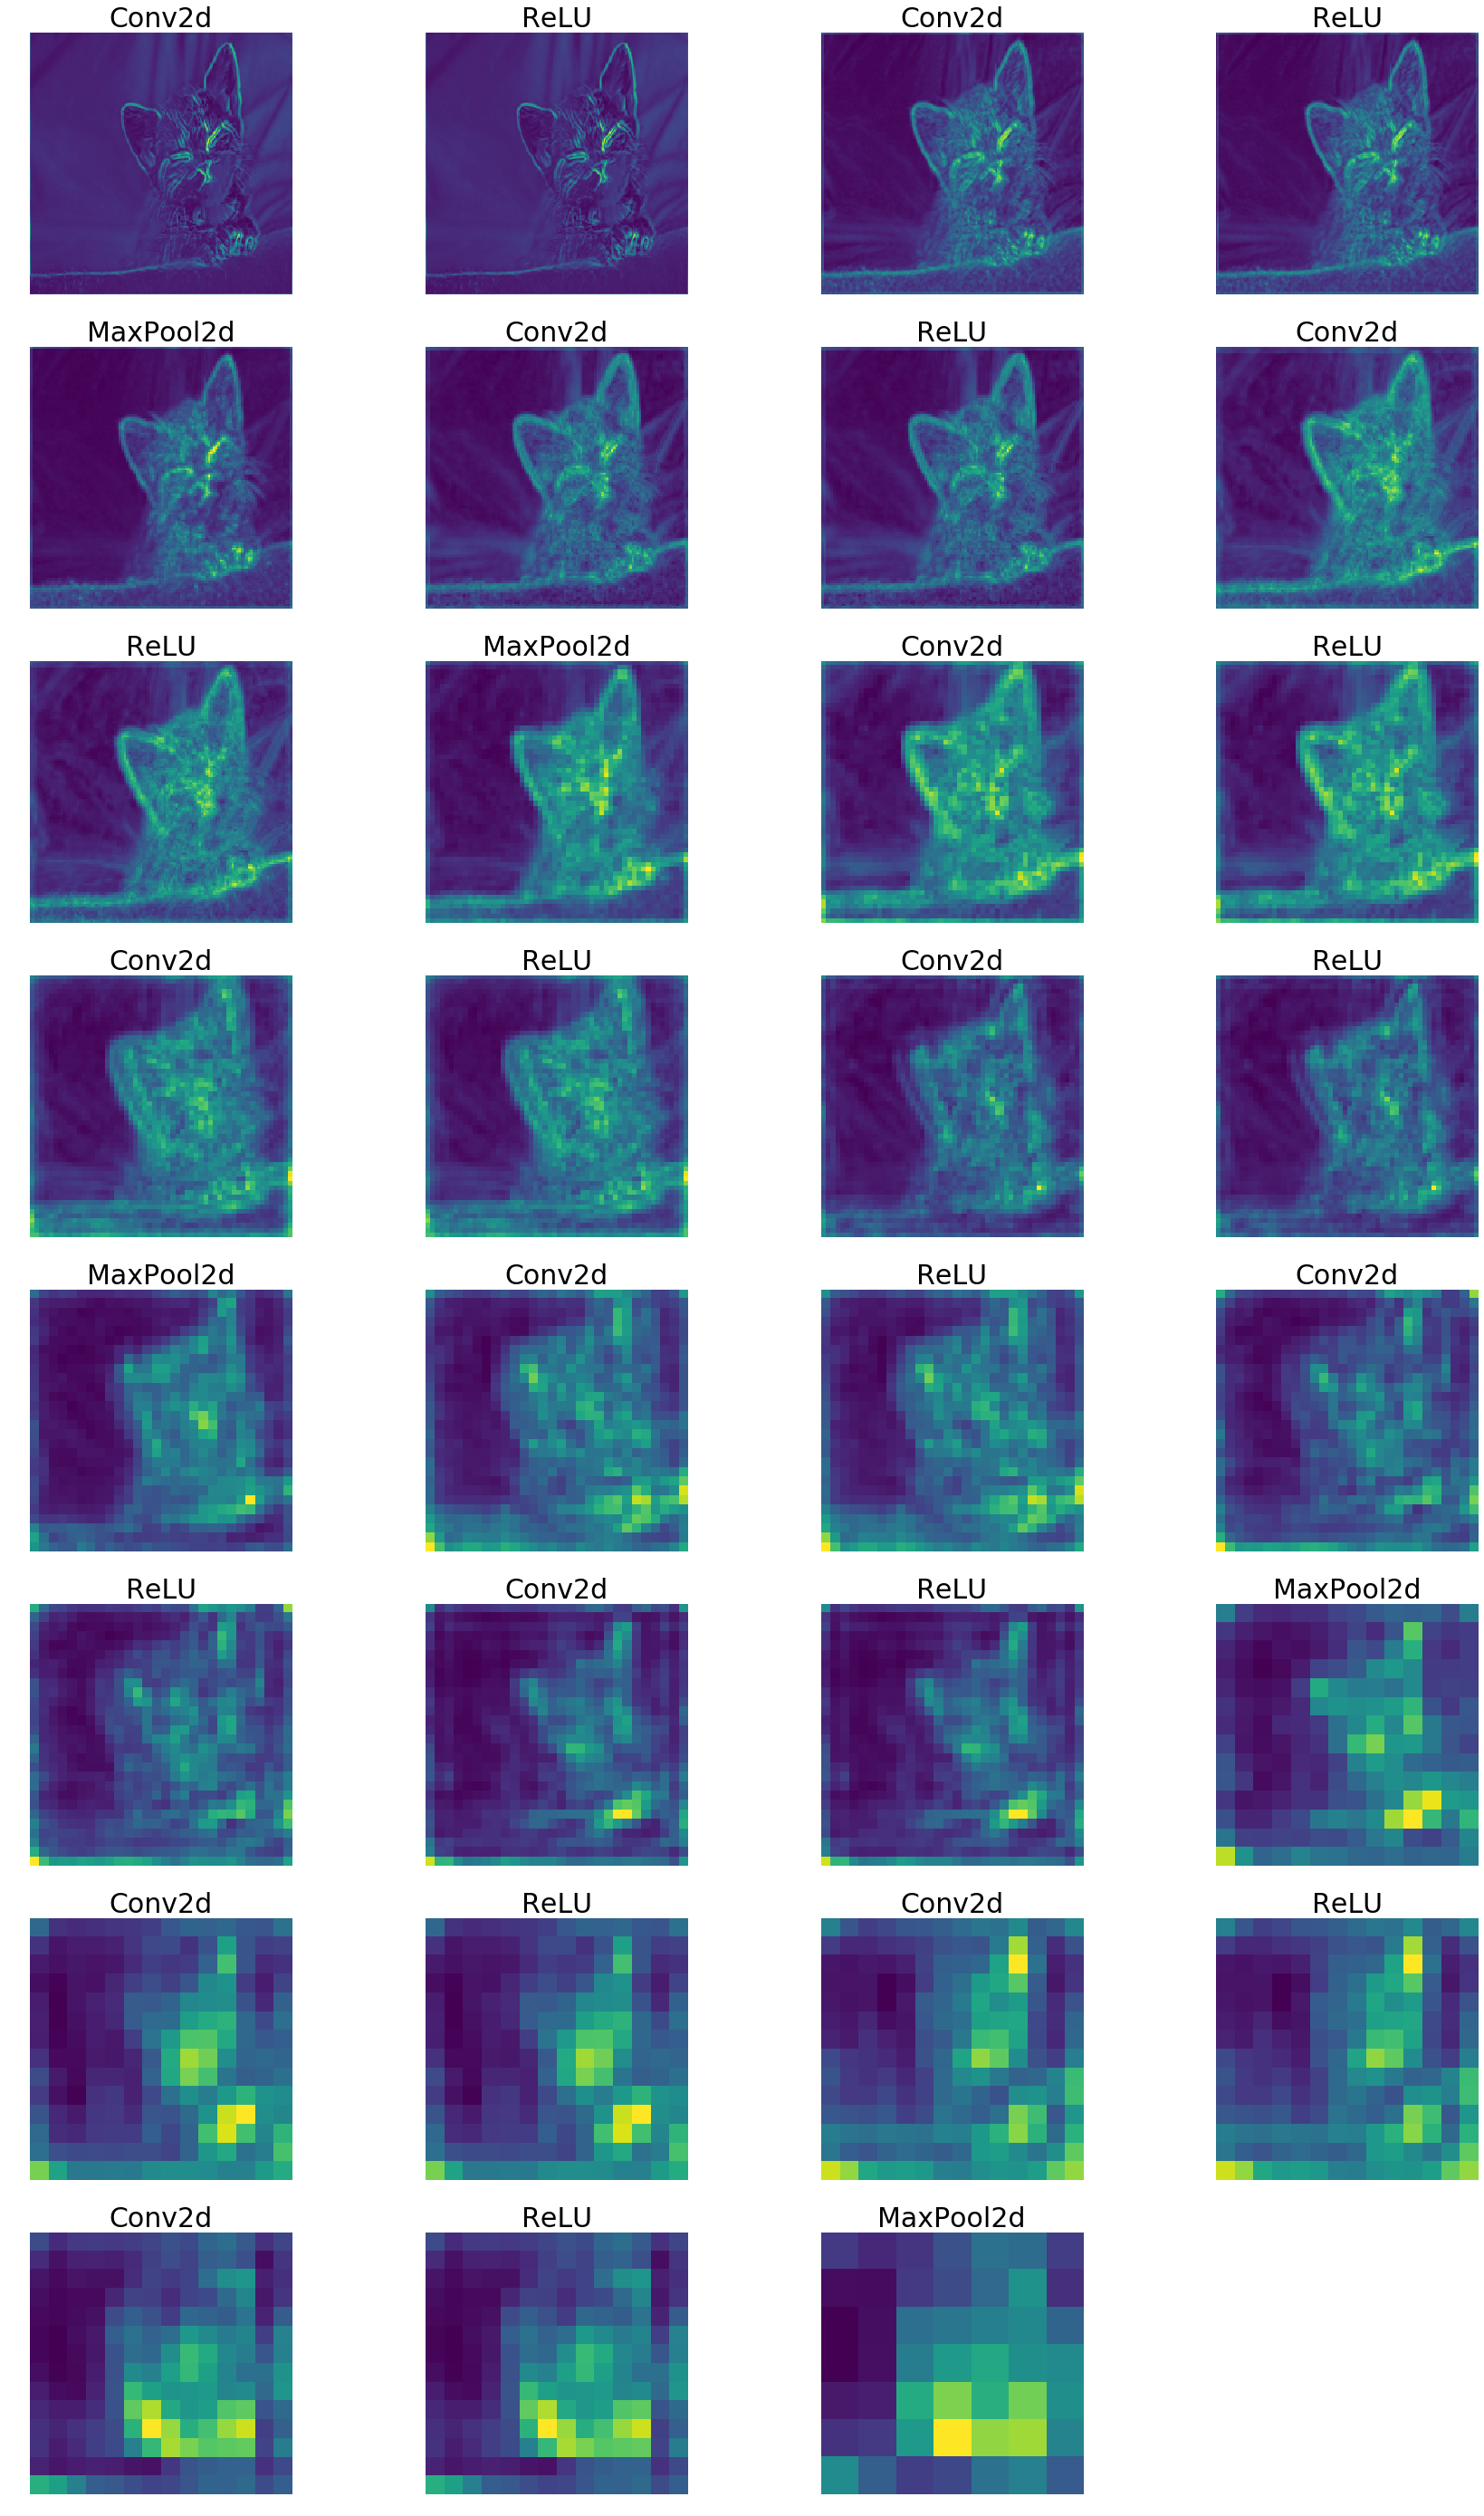

In [234]:
layer_outputs(kitten_2)